# Команда 1
Андрей П.
Эдуард С.
Юлия В.
Дмитрий М.

## Импорт библиотек

In [16]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import math

import warnings
from operator import attrgetter

from pathlib import Path
import os

## Импорт цеэсвешек

In [73]:
#####################################################################################################
# Требования к порядку  столбцов выгружаемой цеэсвехи
# 1. Айди пользователя (на всякий случай, пока столбец без надобности)
# 2. Дата начала
# 3. Дата окончания
# 4. Группировочный признак
# 5. Альтернативный группировочный признак
#    Опционально: отсечь «мусорные» данные

# Тут ниже нужно менять число, где иии и указать адреса с данными
iii = 2
if   iii == 1 : 
    file = 'адрес базы 1'
elif iii == 2 :
    file = 'адрес базы 2'
elif iii == 3 :
    file = 'адрес базы 2'
else:
    file = 0
# Читаем файл
krya = pd.read_csv(file)

# Ниже получаем имя импортируемого файла, для подстановки в заголовок графика
inputFilepath = file
filename_w_ext = os.path.basename(inputFilepath)
filename, file_extension = os.path.splitext(filename_w_ext)
# filename

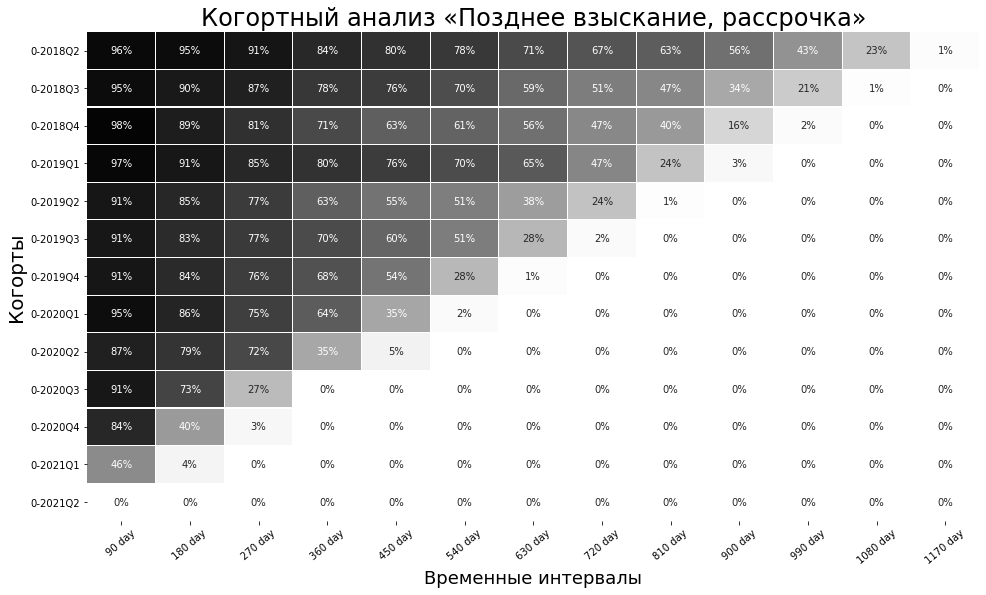

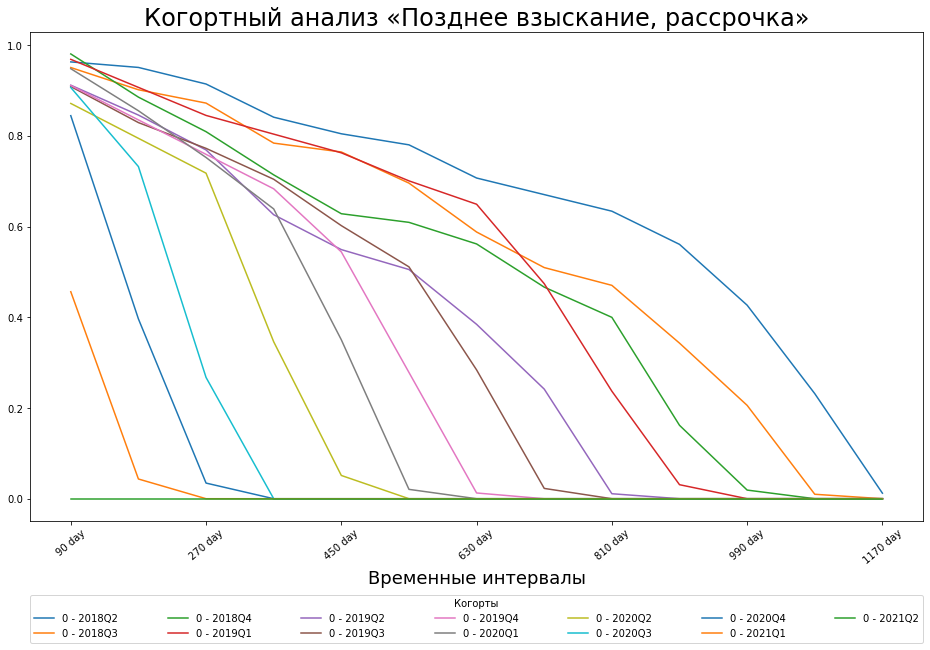

,Время,90 day,180 day,270 day,360 day,450 day,540 day,630 day,720 day,810 day,900 day,990 day,1080 day,1170 day
0,2018Q2,0.963415,0.951220,0.914634,0.841463,0.804878,0.780488,0.707317,0.670732,0.634146,0.560976,0.426829,0.231707,0.012195
1,2018Q3,0.950980,0.901961,0.872549,0.784314,0.764706,0.696078,0.588235,0.509804,0.470588,0.343137,0.205882,0.009804,0.000000
2,2018Q4,0.980952,0.885714,0.809524,0.714286,0.628571,0.609524,0.561905,0.466667,0.400000,0.161905,0.019048,0.000000,0.000000
3,2019Q1,0.969072,0.907216,0.845361,0.804124,0.762887,0.701031,0.649485,0.474227,0.237113,0.030928,0.000000,0.000000,0.000000
4,2019Q2,0.912088,0.846154,0.769231,0.626374,0.549451,0.505495,0.384615,0.241758,0.010989,0.000000,0.000000,0.000000,0.000000
5,2019Q3,0.909091,0.829545,0.772727,0.704545,0.602273,0.511364,0.284091,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000
6,2019Q4,0.911392,0.835443,0.759494,0.683544,0.544304,0.278481,0.012658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2020Q1,0.948454,0.855670,0.752577,0.639175,0.350515,0.020619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2020Q2,0.871795,0.794872,0.717949,0.346154,0.051282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2020Q3,0.906977,0.732558,0.267442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [74]:
funkciya(krya)

# Функция

In [71]:
# Функция «функция»
def funkciya(kva):

    # Переименовываю колонки
    kva.rename(columns={kva.columns[0]:   "all"
                        , kva.columns[1]: "start"
                        , kva.columns[2]: "finish"
                        , kva.columns[3]: "gr_priznak_1"
                        , kva.columns[4]: "gr_priznak_2"}, inplace=True)             

    # Привожу значения к формату даты
    kva['start'] = pd.to_datetime(kva['start'])
    kva['finish'] = pd.to_datetime(kva['finish'])


    #####################################################################################################
    # Деление на Винтажи
    # Беру самый длинный период жизни клиента, значение в днях
    # По хорошему нужно брать (не среднее!) а что-то типа 80—90 квантиля
    # k_vintage = ((kva['finish'] - kva['start']).max()).days # Старый кусочек кода, оставил на всякий случай
    k_vintage = dt.timedelta.total_seconds((kva['finish'] - kva['start']).max()) / (3600*24)

    # Ветвление для назначения часов, дней, недель
    if   k_vintage < 3 : 
        kp = 'hour'
    elif k_vintage < 1500 :
        kp = 'day'
    elif k_vintage < 5000 :
        kp = 'week'
    else:
        kp = 'month'

    # Ветвление для назначения количества (часов, дней, недель)
    if   k_vintage < 3 : 
        kn = 1
    elif k_vintage < 80 :
        kn = 10
    elif k_vintage < 500 :
        kn = 30
    elif k_vintage < 1500 :
        kn = 90
    elif k_vintage < 5000 :
        kn = 20
    else:
        kn = 6

    # Массив в формулу ниже, чтобы избавиться от копипасты
    # Это делать через цикл
    # npp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

    kva['flag_1']  = (kva['start'] + pd.Timedelta(kn*1, kp)  < kva['finish']).astype(int)
    kva['flag_2']  = (kva['start'] + pd.Timedelta(kn*2, kp)  < kva['finish']).astype(int)
    kva['flag_3']  = (kva['start'] + pd.Timedelta(kn*3, kp)  < kva['finish']).astype(int)
    kva['flag_4']  = (kva['start'] + pd.Timedelta(kn*4, kp)  < kva['finish']).astype(int)
    kva['flag_5']  = (kva['start'] + pd.Timedelta(kn*5, kp)  < kva['finish']).astype(int)
    kva['flag_6']  = (kva['start'] + pd.Timedelta(kn*6, kp)  < kva['finish']).astype(int)
    kva['flag_7']  = (kva['start'] + pd.Timedelta(kn*7, kp)  < kva['finish']).astype(int)
    kva['flag_8']  = (kva['start'] + pd.Timedelta(kn*8, kp)  < kva['finish']).astype(int)
    kva['flag_9']  = (kva['start'] + pd.Timedelta(kn*9, kp)  < kva['finish']).astype(int)
    kva['flag_10'] = (kva['start'] + pd.Timedelta(kn*10, kp) < kva['finish']).astype(int)
    kva['flag_11'] = (kva['start'] + pd.Timedelta(kn*11, kp) < kva['finish']).astype(int)
    kva['flag_12'] = (kva['start'] + pd.Timedelta(kn*12, kp) < kva['finish']).astype(int)
    kva['flag_13'] = (kva['start'] + pd.Timedelta(kn*13, kp) < kva['finish']).astype(int)
    kva['flag_14'] = (kva['start'] + pd.Timedelta(kn*14, kp) < kva['finish']).astype(int)
    kva['flag_15'] = (kva['start'] + pd.Timedelta(kn*15, kp) < kva['finish']).astype(int)
    kva['flag_16'] = (kva['start'] + pd.Timedelta(kn*16, kp) < kva['finish']).astype(int)
    kva['flag_17'] = (kva['start'] + pd.Timedelta(kn*17, kp) < kva['finish']).astype(int)


    #####################################################################################################
    # Деление на Когорты
    # Количество дней в Старте делю на количество строк (наблюдений)
    # Если результат больше чем «1» — значит на месяц есть 30 наблюдений
    # Решение топорное, да... Хотелось бы чуть переписать, добавить условий посложнее
    k_kogorta = (kva['start'].max() - kva['start'].min()).days / kva['start'].count() * 30 

    if   k_kogorta > 90 :
        kva['Время'] = pd.PeriodIndex(kva.start, freq='Y')
    elif k_kogorta > 30:
        kva['Время'] = pd.PeriodIndex(kva.start, freq='Q')
    elif k_kogorta > .35:
        kva['Время'] = pd.PeriodIndex(kva.start, freq='M')
    elif k_kogorta > 0.1:
        kva['Время'] = pd.PeriodIndex(kva.start, freq='D')
    else:
        kva['Время'] = pd.PeriodIndex(kva.start, freq='H')

    #####################################################################################################
    # Дополнительный группировочный признак
    # Если  больше Икс когорт, то норм
    # В противном случае я добавляю столбец с дополнительным группировочным признаком
    # Да, как будто это немного не логично
    # Нужно запилить проверку на пустые когорты. Сейчас просто считается количество этих самых когорт
    # Ещё нужно запилить проверку на непустые столбцы с этими самыми признаками

    if len(set(kva['Время'])) > 8 :
        kva['Группа'] = 0 
    else :
        if len(set(kva.gr_priznak_1)) > 15 > len(set(kva.gr_priznak_2)) :
            kva['Группа'] = kva['gr_priznak_2']
        else :
            kva['Группа'] = kva['gr_priznak_1']

    k_gb = len(set(kva['Время']))


    #####################################################################################################
    # Группировка (сводная)
    kva_2 = kva.groupby(['Группа', 'Время']).agg({'start': 'count'
                                            , 'flag_1': 'sum'
                                            , 'flag_2': 'sum'
                                            , 'flag_3': 'sum'
                                            , 'flag_4': 'sum'
                                            , 'flag_5': 'sum'
                                            , 'flag_6': 'sum'
                                            , 'flag_7': 'sum'
                                            , 'flag_8': 'sum'
                                            , 'flag_9': 'sum'
                                            , 'flag_10': 'sum'
                                            , 'flag_11': 'sum'
                                            , 'flag_12': 'sum'
                                            , 'flag_13': 'sum'
                                            , 'flag_14': 'sum'
                                            , 'flag_15': 'sum'
                                            , 'flag_16': 'sum'
                                            , 'flag_17': 'sum'
                                }).reset_index().rename(columns={'start':'cnt_all'})

    #####################################################################################################

    if not kva_2['flag_1'].sum() == 0:
        kva_2[str(kn*1)+" "+str(kp)]  = kva_2['flag_1']  / kva_2['cnt_all']   
    if not kva_2['flag_2'].sum() == 0:
        kva_2[str(kn*2)+" "+str(kp)]  = kva_2['flag_2']  / kva_2['cnt_all']
    if not kva_2['flag_3'].sum() == 0:
        kva_2[str(kn*3)+" "+str(kp)]  = kva_2['flag_3']  / kva_2['cnt_all']
    if not kva_2['flag_4'].sum() == 0:
        kva_2[str(kn*4)+" "+str(kp)]  = kva_2['flag_4']  / kva_2['cnt_all']
    if not kva_2['flag_5'].sum() == 0:
        kva_2[str(kn*5)+" "+str(kp)]  = kva_2['flag_5']  / kva_2['cnt_all']
    if not kva_2['flag_6'].sum() == 0:
        kva_2[str(kn*6)+" "+str(kp)]  = kva_2['flag_6']  / kva_2['cnt_all']
    if not kva_2['flag_7'].sum() == 0:
        kva_2[str(kn*7)+" "+str(kp)]  = kva_2['flag_7']  / kva_2['cnt_all']
    if not kva_2['flag_8'].sum() == 0:
        kva_2[str(kn*8)+" "+str(kp)]  = kva_2['flag_8']  / kva_2['cnt_all']
    if not kva_2['flag_9'].sum() == 0:
        kva_2[str(kn*9)+" "+str(kp)]  = kva_2['flag_9']  / kva_2['cnt_all']
    if not kva_2['flag_10'].sum() == 0:
        kva_2[str(kn*10)+" "+str(kp)] = kva_2['flag_10'] / kva_2['cnt_all']
    if not kva_2['flag_11'].sum() == 0:
        kva_2[str(kn*11)+" "+str(kp)] = kva_2['flag_11'] / kva_2['cnt_all']
    if not kva_2['flag_12'].sum() == 0:
        kva_2[str(kn*12)+" "+str(kp)] = kva_2['flag_12'] / kva_2['cnt_all']
    if not kva_2['flag_13'].sum() == 0:
        kva_2[str(kn*13)+" "+str(kp)] = kva_2['flag_13'] / kva_2['cnt_all']
    if not kva_2['flag_14'].sum() == 0:
        kva_2[str(kn*14)+" "+str(kp)] = kva_2['flag_14'] / kva_2['cnt_all']
    if not kva_2['flag_15'].sum() == 0:
        kva_2[str(kn*15)+" "+str(kp)] = kva_2['flag_15'] / kva_2['cnt_all']
    if not kva_2['flag_16'].sum() == 0:
        kva_2[str(kn*16)+" "+str(kp)] = kva_2['flag_16'] / kva_2['cnt_all']
    if not kva_2['flag_17'].sum() == 0:
        kva_2[str(kn*17)+" "+str(kp)] = kva_2['flag_17'] / kva_2['cnt_all']

    #####################################################################################################
    # Убираем лишние столбики
   
    columns = ['flag_1'
               , 'cnt_all'
               , 'flag_2'
               , 'flag_3'
               , 'flag_4'
               , 'flag_5'
               , 'flag_6'
               , 'flag_7'
               , 'flag_8'
               , 'flag_9'
               , 'flag_10'
               , 'flag_11'
               , 'flag_12'
               , 'flag_13'
               , 'flag_14'
               , 'flag_15'
               , 'flag_16'
               , 'flag_17'] 
    kva_3 = kva_2.drop(columns, 1)

    #####################################################################################################
    
    # Столбцы «Время» (когорты) и «Группа» (доп. группировочный признак) делаем индексами,
    # чтобы сбросить индексы в конце блока
   

    kva_3 = kva_3.set_index(['Группа', 'Время'])

    # sns.set()
    fig, ax = plt.subplots(figsize=(16, 9))
    ax = sns.heatmap(data=kva_3, annot = True
               , fmt ='.0%', vmin=0, vmax=1
               , cmap = 'gist_yarg', cbar = False
               , linewidths=.1
                    )
    plt.xticks(rotation=40)
    plt.title('Когортный анализ'+' «'+filename+'»', fontsize = 24)
    plt.xlabel('Временные интервалы', fontsize = 18)
    plt.ylabel('Когорты', fontsize = 20)
    plt.show()
    # ax.set(xlabel='Временные интервалы', ylabel='Когорты')
    # Различные цветовые палитры: Blues YlGnBu Pastel2

    # График построен. Сбрасываем индексы у датафрейма. 
    kva_3 = kva_3.reset_index()

    #####################################################################################################
    # Блок построения графиков
    # Сперва транспонируем таблицу, плюс небольшой костыль для «сдвоенного» столбца индексов
    cnt_t = math.ceil(kva_3['Время'].count() / 2)

    kva_3 = kva_3
    kva_3['Группа и Время'] = kva_3['Группа'].astype(str) + ' - ' + kva_3['Время'].astype(str)
    lst = kva_3['Группа и Время']
    kva_3.drop(labels=['Группа и Время'], axis=1,inplace = True)
    kva_3.insert(0, 'Группа и Время', lst)

    kva_4 = kva_3.T
    kva_4.columns = kva_4.iloc[0]
    kva_4 = kva_4.iloc[3:,:]



    kva_4.plot(figsize=(16, 9))
    plt.legend(bbox_to_anchor=(0.0, 1.0, 1.0, -2.4), loc=10
               , ncol=cnt_t, mode="expand", borderaxespad=0., title='Когорты')
    plt.xticks(rotation=40)
    plt.title('Когортный анализ'+' «'+filename+'»', fontsize = 24)
    plt.xlabel('Временные интервалы', fontsize = 18)
    # plt.ylabel('Когорты', fontsize = 20)
    plt.show()

    # Если столбец с дополнительным группировочным списком пуст, то скрываем его
    # И скрываем костыльный сдвоенный столбец
    if not kva_3['Группа'].sum() != 0:
        kva_3 = kva_3.drop(["Группа"], 1)
    kva_3 = kva_3.drop(["Группа и Время"], 1)    

    # Таблицу с когортно-винтажным анализом
    return kva_3